# Task 5

In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data) # creating the dataframe using the data.

# Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.isnull().sum() # checking for null values

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [4]:
df.drop_duplicates() # ddropping duplicates if any

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [5]:
df.shape

(15, 2)

In [6]:
df.rename(columns = {'Ground Temperature' : 'Ground_Temperature' ,'Chirps/Second' : 'Chirps_Second'},	inplace = True)

In [7]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [8]:
# outlier detection
iqr = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps_Second.quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(19.699999999999996, 12.9)

In [9]:
iqr = df.Ground_Temperature.quantile(0.75) - df.Ground_Temperature.quantile(0.25)
upper_threshold = df.Ground_Temperature.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Ground_Temperature.quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(98.4, 58.400000000000006)

There is no outlier in this data.

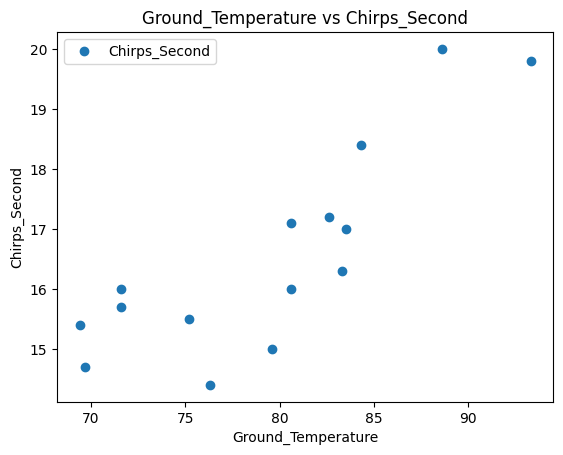

In [10]:
df.plot(x='Ground_Temperature', y='Chirps_Second', style='o')
plt.title('Ground_Temperature vs Chirps_Second')
plt.xlabel('Ground_Temperature')
plt.ylabel('Chirps_Second')
plt.show()

In [11]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


There is a linear relationship between Ground_Temperature and Chirps/Second => we can go ahead and develop a linear regression model. No transformation required.


# Preparing the data

In [12]:
# splitting the data
X = df.loc[:, ['Ground_Temperature']].values 
y = df.loc[:, 'Chirps_Second'].values 
from sklearn.model_selection import train_test_split #import the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [14]:
# scalling the data
from sklearn.preprocessing import StandardScaler # importing the scaler function
scaler = StandardScaler() #initialize the scaler
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [15]:
X_test, X_train

(array([[-1.37856885],
        [ 0.17815883],
        [ 2.37487457],
        [-1.75910228],
        [ 0.00518909]]),
 array([[ 1.56191678],
        [ 0.67977109],
        [-1.37856885],
        [-0.75587777],
        [-1.70721136],
        [ 0.52409832],
        [ 0.17815883],
        [ 0.64517714],
        [ 0.81814688],
        [-0.56561106]]))

# Modelling

In [16]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()
regressor.fit(X_train, y_train) # y =  m * x + c

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)
y_pred

array([14.81110097, 16.89894178, 19.84511715, 14.30073989, 16.66695947])

In [18]:
data = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred}) # comparing actual value with the predicred value.
data

,Actual,Predicted
0,15.7,14.811101
1,16.0,16.898942
2,19.8,19.845117
3,15.4,14.300740
4,15.0,16.666959


# R^2 value

In [19]:
regressor.score(X_test,y_test) # getting R^2 value using .score method.

0.6316323814860263

since 0.63 is less than 0.8 so it's not consider as strong correlation.

In [20]:
#  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
regressor.predict(scaler.transform([[95]]))

array([20.23948708])